In [2]:
# Data_Analysis_and_Visualization.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import numpy as np

# Add the scripts directory to the path to access fraud_detection_pipeline.py
sys.path.append(os.path.abspath('../scripts'))

from Model_training import prepare_data, define_and_train_models



In [3]:
# Prepare data
(X_train_cc, X_test_cc, y_train_cc, y_test_cc), (X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud) = prepare_data()

# Train models and capture results
results = define_and_train_models(X_train_cc, y_train_cc, X_test_cc, y_test_cc,
                                  X_train_fraud, y_train_fraud, X_test_fraud, y_test_fraud)

# Visualization of Model Accuracies
model_names = list(results.keys())
credit_card_accuracies = [metrics['Credit Card Accuracy'] for metrics in results.values()]
fraud_accuracies = [metrics['Fraud Accuracy'] for metrics in results.values()]

# Create a DataFrame for better visualization
accuracy_df = pd.DataFrame({
    'Model': model_names,
    'Credit Card Accuracy': credit_card_accuracies,
    'Fraud Accuracy': fraud_accuracies
})



Training Logistic Regression...
Accuracy (Credit Card Data): 0.9990695551420246
Accuracy (Fraud Data): 0.9057009562253913

Training Decision Tree...
Accuracy (Credit Card Data): 0.9990871107053826
Accuracy (Fraud Data): 0.8923005657942626

Training Random Forest...
Accuracy (Credit Card Data): 0.9995786664794073
Accuracy (Fraud Data): 0.9343877179631407



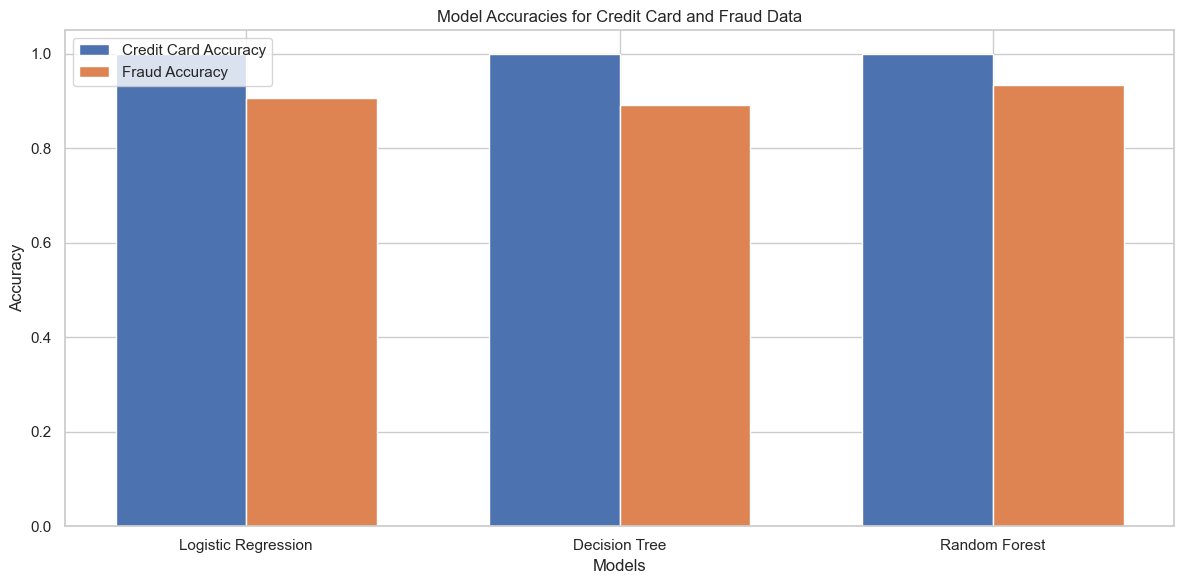

In [4]:
# Set the plot style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(model_names))  # Use numpy for array of model indices

# Bar plots for accuracy
plt.bar(x, credit_card_accuracies, width=bar_width, label='Credit Card Accuracy', align='center')
plt.bar(x + bar_width, fraud_accuracies, width=bar_width, label='Fraud Accuracy', align='center')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies for Credit Card and Fraud Data')
plt.xticks(x + bar_width / 2, model_names)  # Adjust x-ticks to center between bars
plt.legend()
plt.tight_layout()
plt.show()
